In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Admission_Predict_A3.csv")

In [ ]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


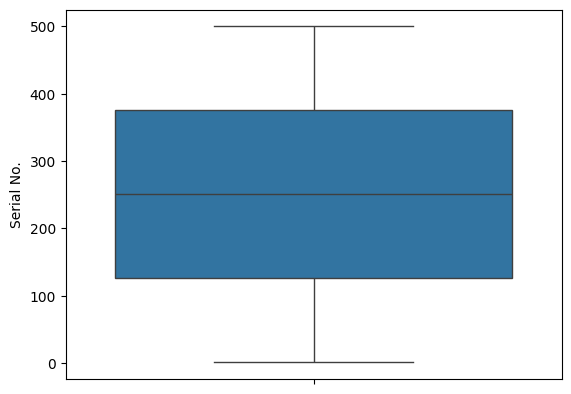

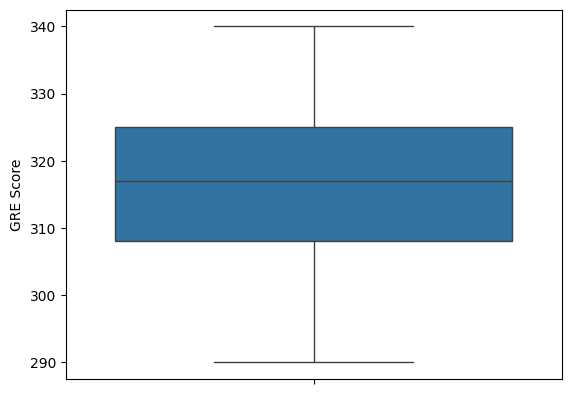

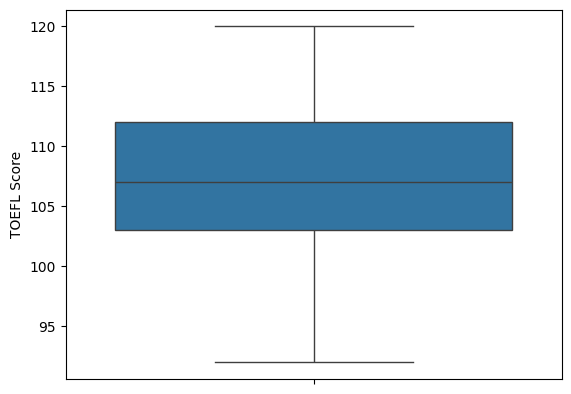

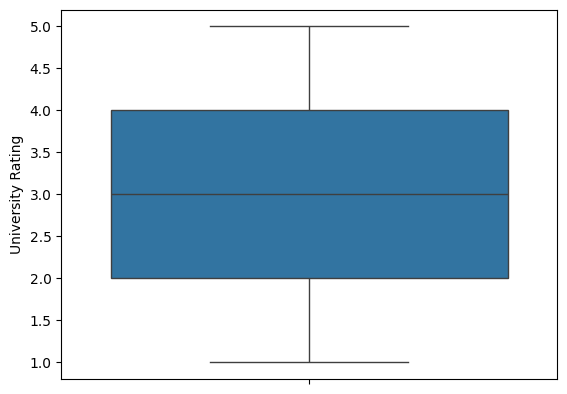

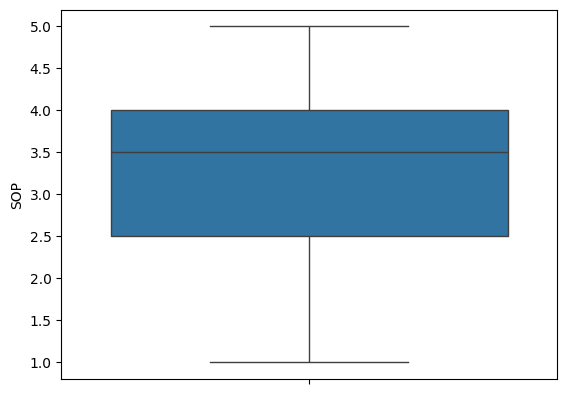

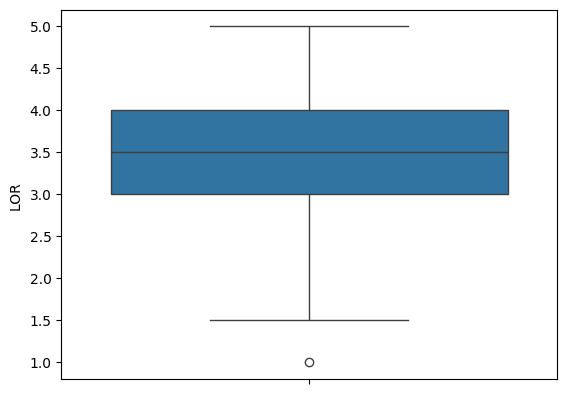

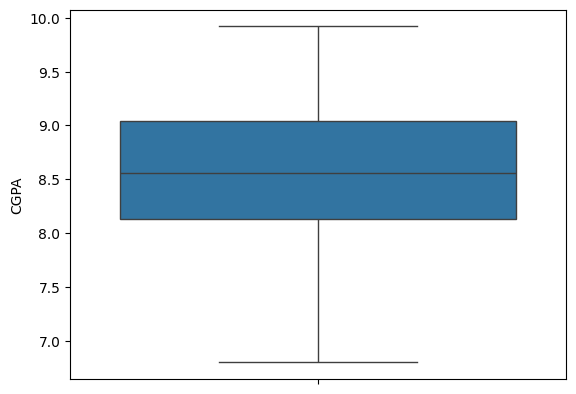

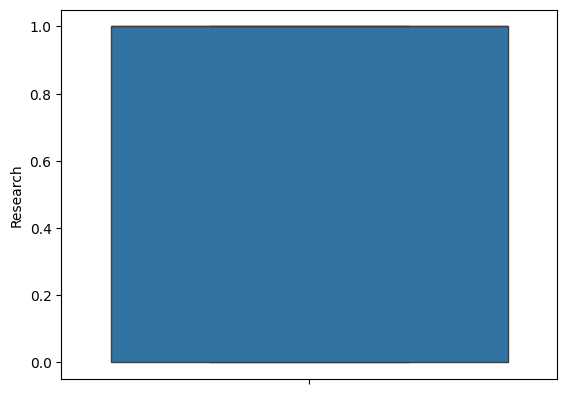

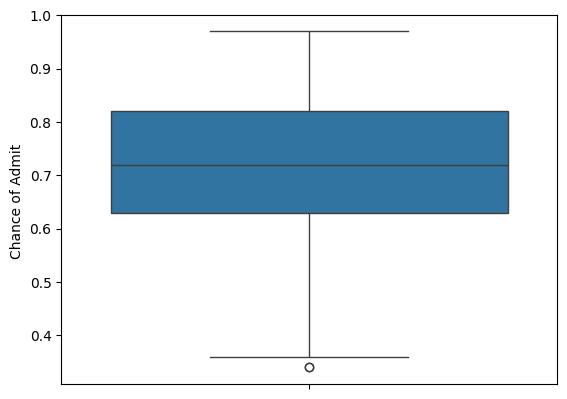

In [ ]:
for i in data.columns:
  sns.boxplot(data[i])
  plt.show()

In [ ]:
for d in data.columns:
  print(d,max(data[d])-min(data[d]))

Serial No. 499
GRE Score 50
TOEFL Score 28
University Rating 4
SOP 4.0
LOR  4.0
CGPA 3.12
Research 1
Chance of Admit  0.6299999999999999


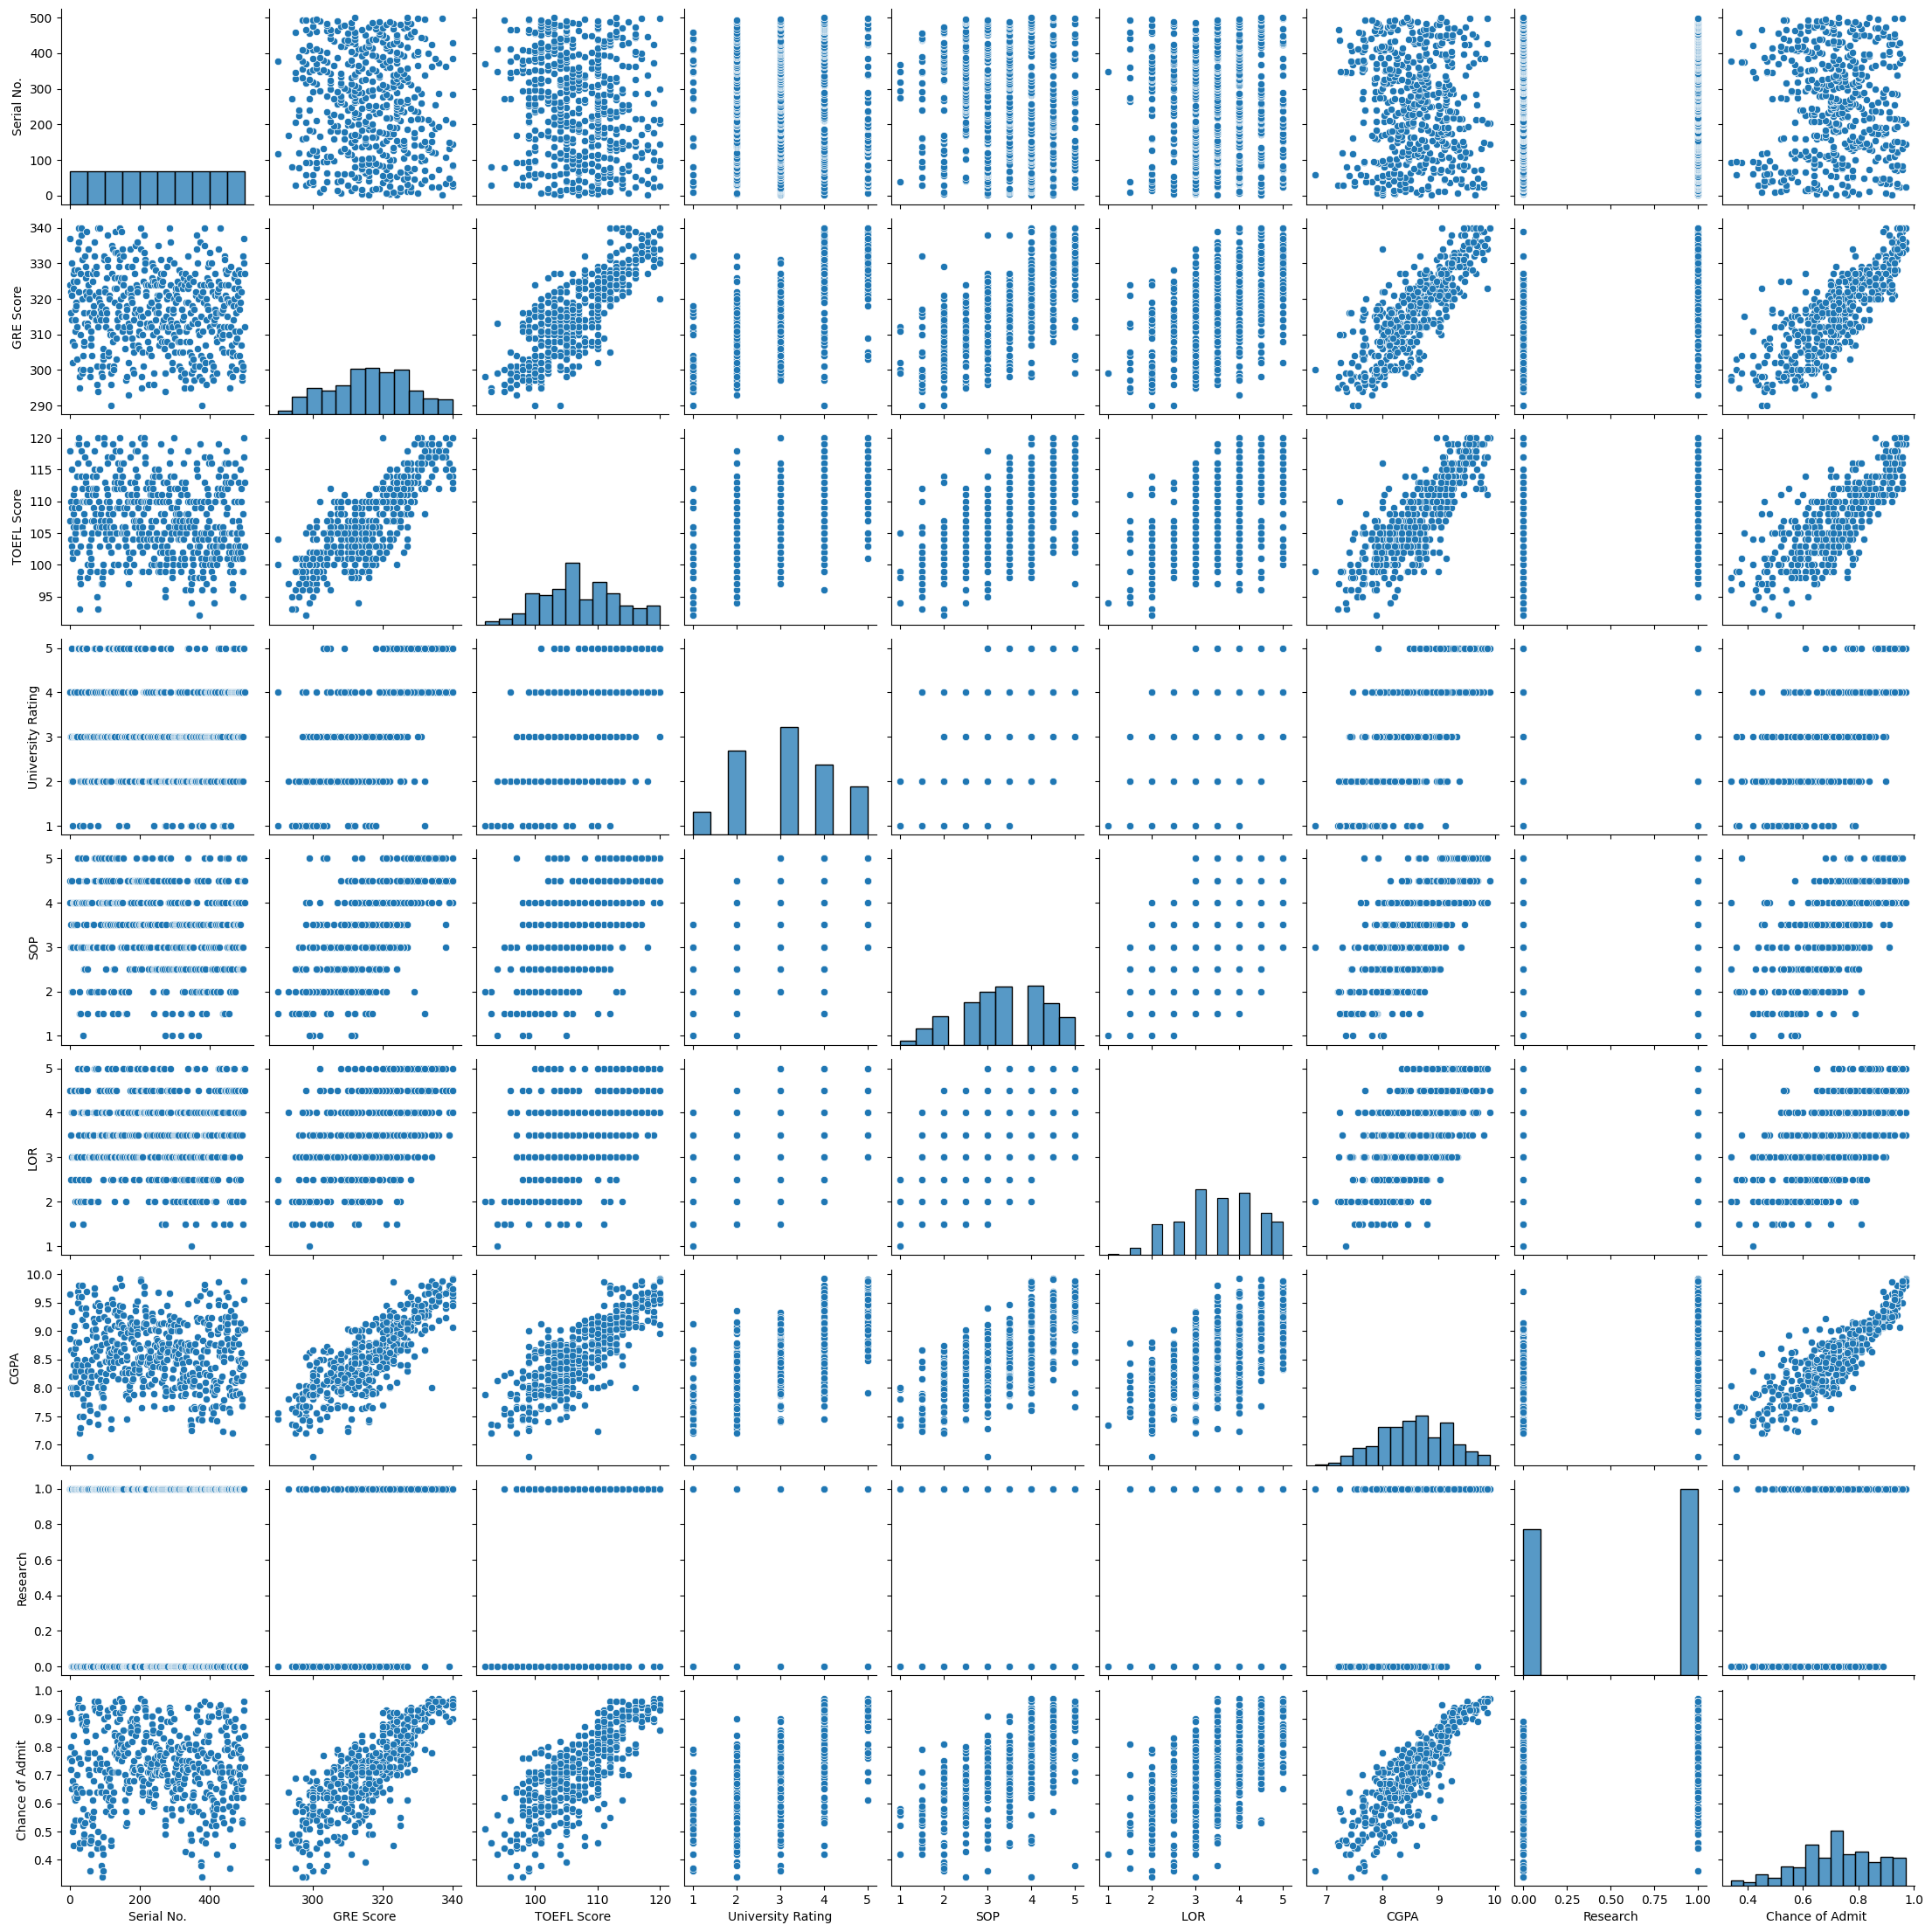

In [ ]:
sns.pairplot(data=data)

In [ ]:
data.rename(columns={"Chance of Admit ":"Target"}, inplace=True)

In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Target'],
      dtype='object')

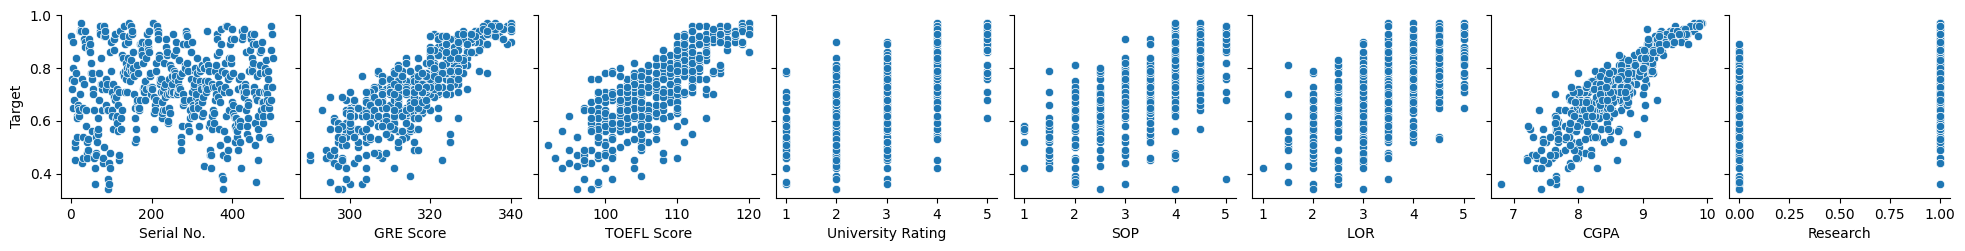

In [ ]:
sns.pairplot(data, x_vars=[col for col in data.columns if col != 'Target'], y_vars='Target')


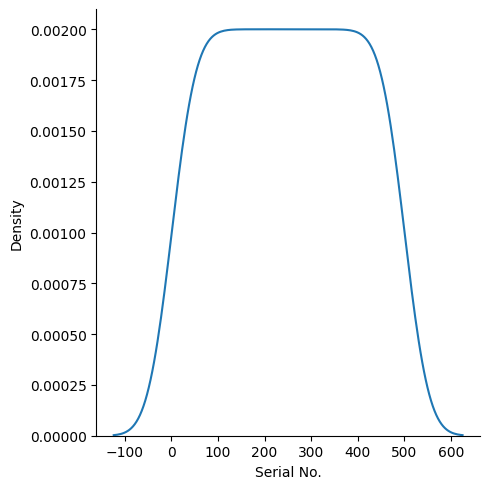

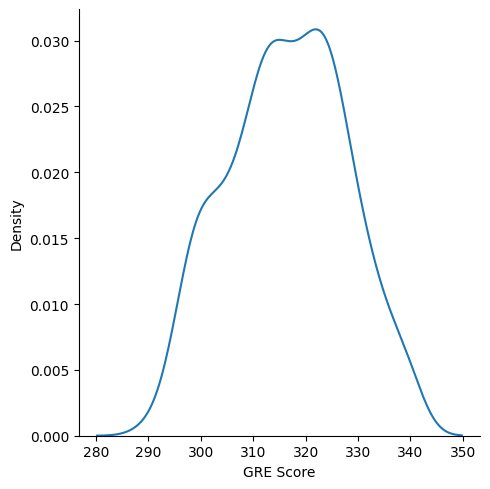

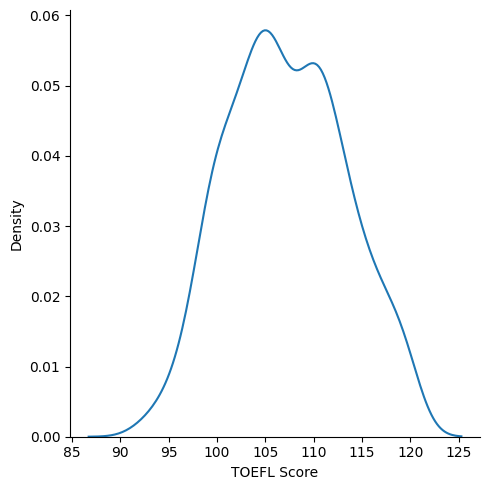

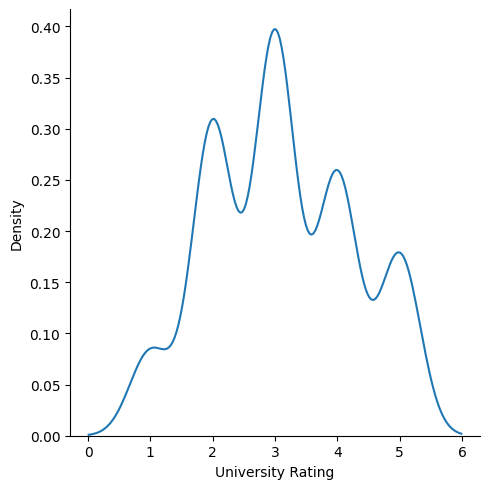

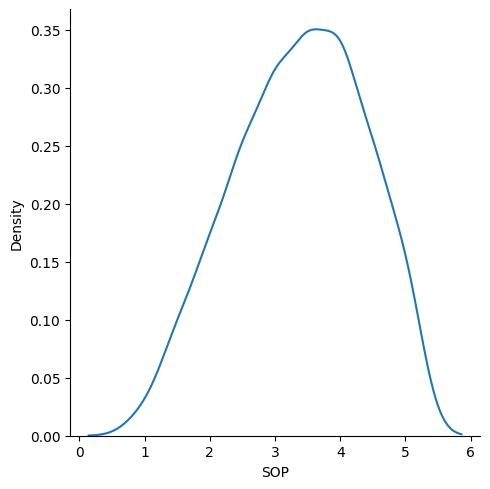

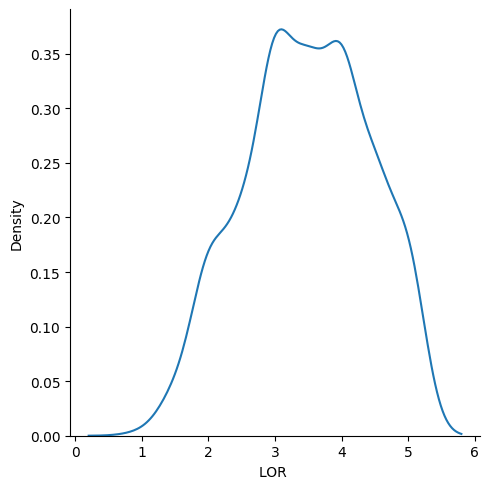

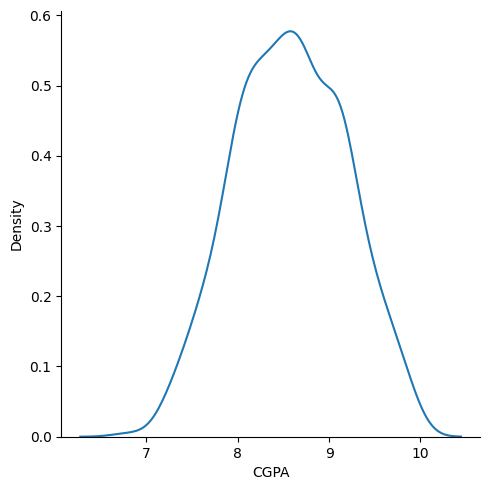

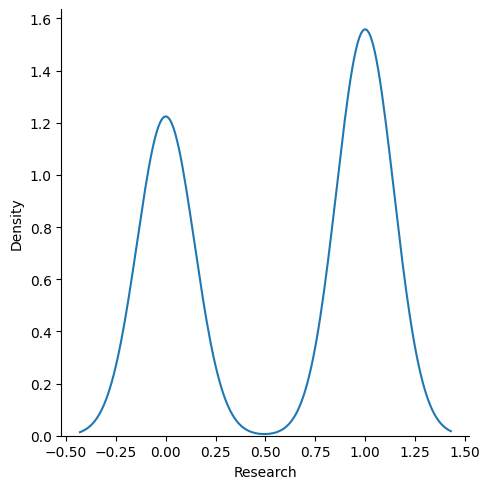

In [ ]:
for d in data.columns:
    if d!="Target":
        sns.displot(data=data,x=data[d], kind="kde")
        plt.show()


In [ ]:
data_normalised=data.copy()

In [ ]:
data_normalised.drop(columns="Serial No.", inplace=True)

In [ ]:
data.head(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1,337,118,4,4.5,4.5,9.65,1,0.92


In [ ]:
data_normalised.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,337,118,4,4.5,4.5,9.65,1,0.92


Here the columns in the data appear to have a normal distribution with varying scales, in order to ensure each of them contributes equally and have values within a specified range, standard scaler is the most apt normalisation technique

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
f=scaler.fit_transform(data_normalised.drop(columns="Target"))
t=data_normalised["Target"]
data_normalised=pd.DataFrame(f, columns=data_normalised.drop(columns="Target").columns)
data_normalised["Target"]=t


In [ ]:
data_normalised.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,0.65


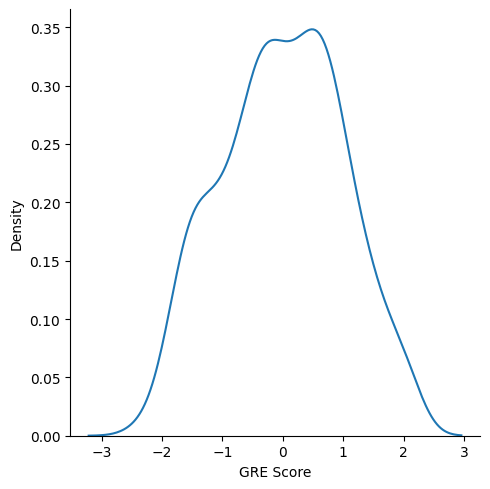

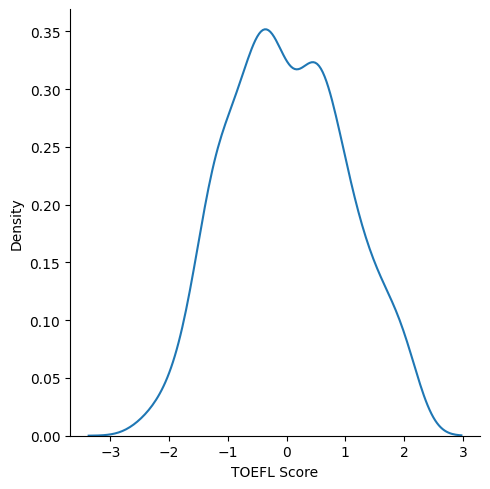

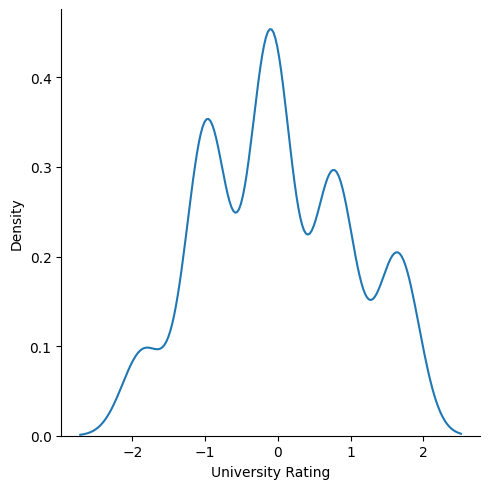

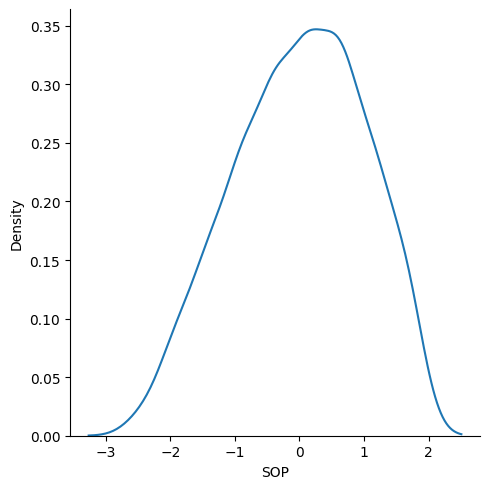

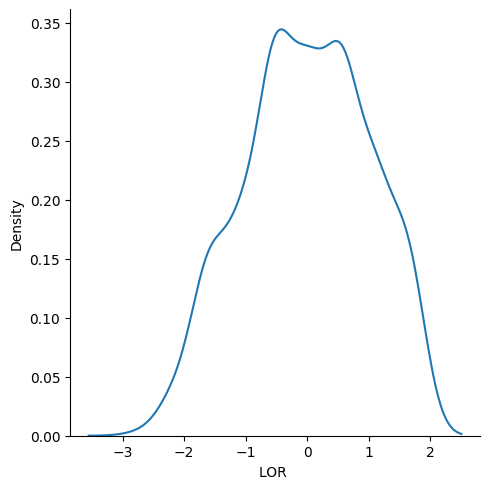

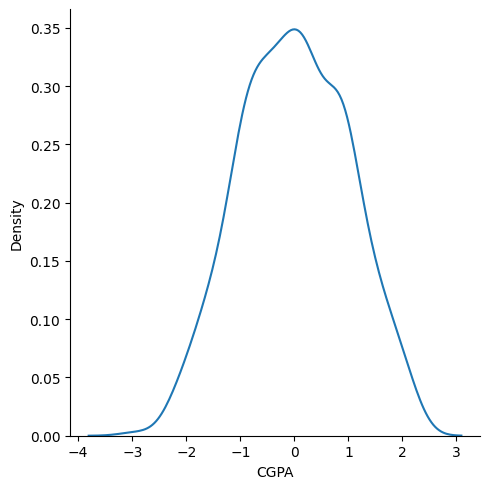

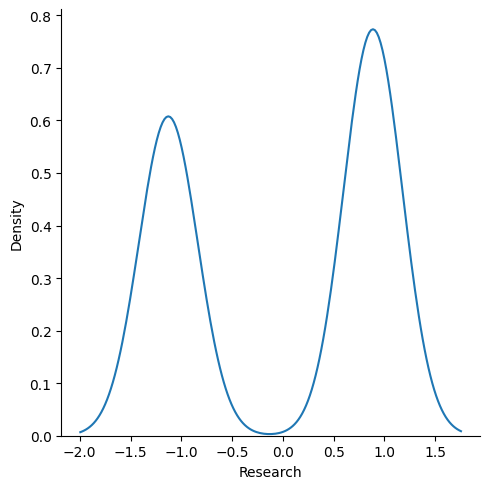

In [ ]:
for d in data_normalised.columns:
    if d!="Target":
        sns.displot(data=data_normalised,x=data_normalised[d], kind="kde")
        plt.show()

In order to perform linear regression and logistic regression, we use gradient based methods, when features have vastly different ranges, the gradients can vary in magnitude, leading to inefficiencies in the optimization process.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Initialize KBinsDiscretizer with 3 bins
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# Reshape the column to 2D and fit
est.fit(data_normalised[['Target']])

# Transform the target column and assign it back, flattening the result
data_normalised['Target'] = est.transform(data_normalised[['Target']]).flatten()

# Check the transformation



In [ ]:
data_normalised.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1.819238,1.778865,0.775582,1.13736,1.098944,1.776806,0.886405,2.0


In [ ]:
X=data_normalised.drop(columns="Target")
Y=data_normalised["Target"]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=1)
new_X= clf.fit_transform(X, Y)

new_data =pd.DataFrame(data=new_X, columns=["LDA1"])


The single LDA component corresponds to the direction that maximizes the separation between the two classes in the feature space, so retaining this one component provides the most meaningful reduction while preserving the ability to differentiate between the classes. Training time and model complexity are significantly reduced, since the original dataset had a lot of columns

In [ ]:
new_data.head()
new_data['Target']=data_normalised["Target"]
new_data

,LDA1,Target
0,3.157953,2.0
1,1.200234,2.0
2,-0.901783,1.0
3,0.343620,2.0
4,-1.330956,1.0
...,...,...
495,1.710490,2.0
496,3.733796,2.0
497,3.092479,2.0
498,-0.242740,1.0


<Axes: xlabel='Target', ylabel='LDA1'>

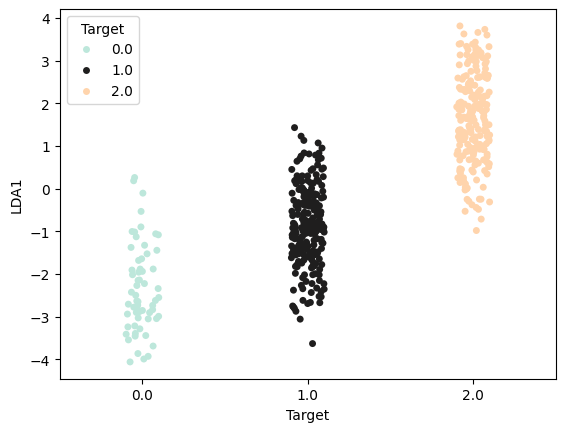

In [ ]:
sns.stripplot(data=new_data, x=new_data['Target'], y=new_data['LDA1'],hue=new_data['Target'], jitter=True,palette="icefire")


So we can observe that the original data having 8 features is now just reduced to one feature which easily splits the Target or the Chance of Admit into 3 distinct classes

In [ ]:
# now we will get back our original Target values to apply Linear Regression with SGD


In [ ]:
new_data['Target'] = data['Target']

In [ ]:
new_data.head()

,LDA1,Target
0,3.157953,0.92
1,1.200234,0.76
2,-0.901783,0.72
3,0.343620,0.80
4,-1.330956,0.65


Now we will make a linear regression model for the LDA transformed data

Epoch 100: Loss = 0.01316507812589407
Epoch 200: Loss = 0.0037448748480528593
Epoch 300: Loss = 0.0035791248083114624
Epoch 400: Loss = 0.003576208371669054
Epoch 500: Loss = 0.00357615714892745
Epoch 600: Loss = 0.003576156683266163
Epoch 700: Loss = 0.0035761562176048756
Epoch 800: Loss = 0.0035761562176048756
Epoch 900: Loss = 0.0035761562176048756
Epoch 1000: Loss = 0.0035761562176048756


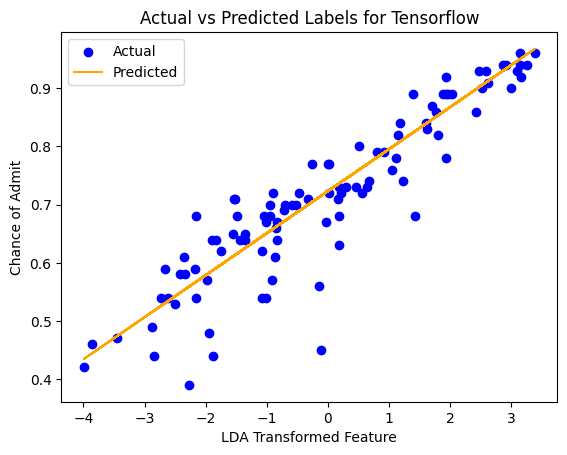

tf.Tensor(0.0035023086, shape=(), dtype=float32)
Loss for tensorflow linear regression= 0.0035023086


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data.drop(columns="Target"), new_data["Target"], test_size=0.2, random_state=42)
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)  # Reshape to (400, 1)
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)  # Reshape to (100, 1)
# Initialize weights and biases
n_features = X_train.shape[1]
W = tf.Variable(tf.random.normal([n_features, 1]), dtype=tf.float32)  # Weight initialization
b = tf.Variable(tf.zeros([1]), dtype=tf.float32)  # Bias initialization

# Loss function (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Stochastic Gradient Descent optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training step
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_pred =tf.matmul(X,W) + b
        loss = compute_loss(y, y_pred)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return loss

# Train the model for 1000 epochs
y_train_tensor = tf.reshape(y_train_tensor, [-1, 1])
y_test_tensor = tf.reshape(y_test_tensor, [-1, 1])

n_epochs = 1000
for epoch in range(n_epochs):
    loss = train_step(X_train_tensor, y_train_tensor)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.numpy()}")

# Visualize actual vs. predicted labels
y_pred_tensor = tf.matmul(X_test_tensor,W) + b
# print(y_train_tensor)

y_pred = y_pred_tensor.numpy()

# Plotting
# print(y_pred)
# plt.scatter(np.arange(len(y_test)), y_test, label='Actual')
# plt.scatter(np.arange(len(y_test)), y_pred, label='Predicted', marker='x')
plt.scatter(X_test, y_test, color="blue",  label='Actual')
plt.plot(X_test, y_pred,color="orange",  label='Predicted')
plt.legend()
plt.xlabel('LDA Transformed Feature')
plt.ylabel('Chance of Admit')
plt.title('Actual vs Predicted Labels for Tensorflow')
plt.show()
print(compute_loss(y_test_tensor,y_pred_tensor))
#loss for tensor flow linear regression
print("Loss for tensorflow linear regression=",compute_loss(y_test_tensor,y_pred_tensor).numpy())

Now Using Sk learn to do the Linear Regression

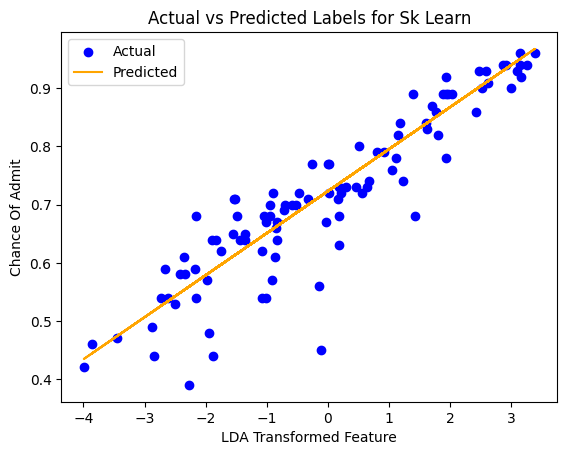

Loss for sklearn Linear Regression = 0.003502329041704609


In [ ]:
from sklearn.linear_model import LinearRegression
skreg=LinearRegression()
skreg.fit(X_train, y_train)
Y_pred_sk=skreg.predict(X_test)
plt.scatter(X_test, y_test, color="blue", label='Actual')
plt.plot(X_test, Y_pred_sk,color="orange", label='Predicted', )
plt.legend()
plt.xlabel('LDA Transformed Feature')
plt.ylabel('Chance Of Admit')
plt.title('Actual vs Predicted Labels for Sk Learn')
plt.show()
print("Loss for sklearn Linear Regression =",np.sum(np.square(Y_pred_sk-y_test))/len(y_test))

Hence The Linear Regression performed on LDA Features lead to good results and very low loss

Task -5 (LOGISITIC REGRESSION)

In [ ]:
data_categorized=data_normalised.copy()
data_categorized.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,2.0
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,2.0
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,1.0
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,2.0
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,1.0


In [ ]:
data_categorized['Target']=data['Target']

In [ ]:
#create a data_cateogorized to implement logistic regression
data_categorized.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,0.65


Creating bins for Target attribute as low , medium and high to be used in Logistic Regression

In [ ]:
bin_edges=[0.3,0.5,0.7,1]
bin_labels=["low","medium","high"]
data_categorized['Target']=pd.cut(data_categorized['Target'], bins=bin_edges, labels=bin_labels,include_lowest=True)

In [ ]:
data_categorized.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Target
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,high
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,high
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,high
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,high
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,medium


In [ ]:
data_categorized['Target'].value_counts()

,count
Target,
high,287
medium,174
low,39


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models
X=data_categorized.drop(columns="Target")
Y=data_categorized["Target"]
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.values.reshape(-1, 1)).toarray()
X_train , X_test, Y_train , Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

model= models.Sequential()
model.add(layers.Dense(3, activation='softmax', input_shape=(X_train.shape[1],)))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.2,verbose=0)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
test_loss, test_acc= model.evaluate(X_test,Y_test)
print("Accuracy , Loss for tensorflow Logistic Regression =",100*test_acc, test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.5213  
Accuracy , Loss for tensorflow Logistic Regression = 81.99999928474426 0.49524539709091187


Contructing a Function to Evaluate our Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average="macro", zero_division=np.nan)
    recall = recall_score(y_true, y_pred,average="macro")
    f1 = f1_score(y_true, y_pred,average="macro")
    return accuracy, precision,recall,f1

    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    # print(f"F1 Score: {f1:.4f}")


Trying Out Different Learning Rates as well as Regularization strength  for the Logistic Regression (TASK 6)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.02 and regularisation strength = 0.0001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
ROC-AUC score 0.9156762234808453
Accuracy: 0.8300
Precision: 0.6915
Recall: 0.8042
F1 Score: 0.7202


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.02 and regularisation strength = 0.001
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
ROC-AUC score 0.917036263223238
Accuracy: 0.8500
Precision: 0.7064
Recall: 0.8186
F1 Score: 0.7348


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.02 and regularisation strength = 0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9151001468963654
Accuracy: 0.8500
Precision: 0.7064
Recall: 0.8949
F1 Score: 0.7441


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.02 and regularisation strength = 0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9009980145904515
Accuracy: 0.8000
Precision: 0.5768
Recall: 0.7945
F1 Score: 0.5508


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.02 and regularisation strength = 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9008219484374945
Accuracy: 0.6400
Precision: 0.4417
Recall: 0.6438
F1 Score: 0.4040


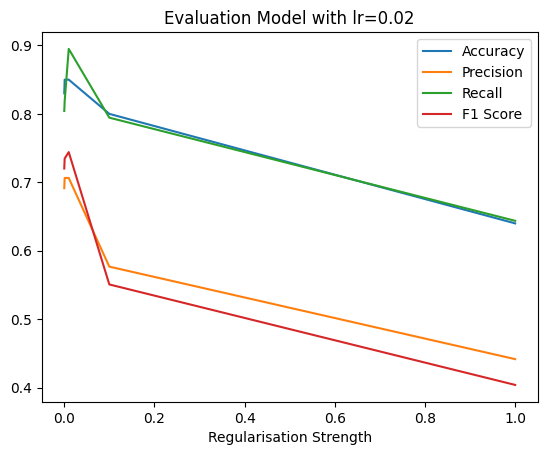

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.1 and regularisation strength = 0.0001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.920383277242521
Accuracy: 0.8400
Precision: 0.7267
Recall: 0.7641
F1 Score: 0.7411


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.1 and regularisation strength = 0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9210653791431103
Accuracy: 0.8200
Precision: 0.7119
Recall: 0.7490
F1 Score: 0.7261


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.1 and regularisation strength = 0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9154192659969972
Accuracy: 0.8600
Precision: 0.7721
Recall: 0.9032
F1 Score: 0.8148


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.1 and regularisation strength = 0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9025286182849208
Accuracy: 0.7900
Precision: 0.5685
Recall: 0.7848
F1 Score: 0.5428


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.1 and regularisation strength = 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.872869331493281
Accuracy: 0.7300
Precision: 0.5185
Recall: 0.7333
F1 Score: 0.4937


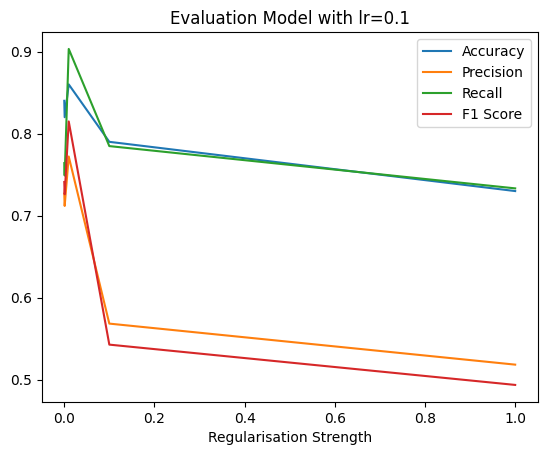

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.3 and regularisation strength = 0.0001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9179506417951796
Accuracy: 0.8000
Precision: 0.6934
Recall: 0.7395
F1 Score: 0.7083


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.3 and regularisation strength = 0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ROC-AUC score 0.921051548824658
Accuracy: 0.8400
Precision: 0.6998
Recall: 0.8107
F1 Score: 0.7279


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.3 and regularisation strength = 0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9155113113621516
Accuracy: 0.8200
Precision: 0.7101
Recall: 0.8773
F1 Score: 0.7546


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.3 and regularisation strength = 0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
ROC-AUC score 0.905692725808272
Accuracy: 0.7200
Precision: 0.5101
Recall: 0.7238
F1 Score: 0.4850


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.3 and regularisation strength = 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.8821037816836137
Accuracy: 0.6300
Precision: 0.4333
Recall: 0.6602
F1 Score: 0.3941


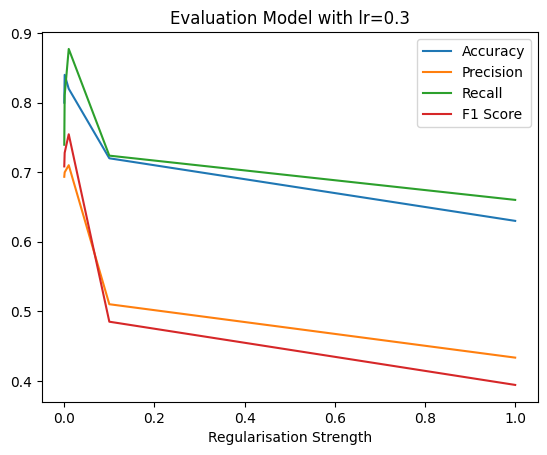

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.5 and regularisation strength = 0.0001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ROC-AUC score 0.9226178420085983
Accuracy: 0.8100
Precision: 0.7322
Recall: 0.7302
F1 Score: 0.7274


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.5 and regularisation strength = 0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9192845086752649
Accuracy: 0.8600
Precision: 0.7434
Recall: 0.8427
F1 Score: 0.7750


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.5 and regularisation strength = 0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ROC-AUC score 0.9119592366861274
Accuracy: 0.8100
Precision: 0.6730
Recall: 0.8696
F1 Score: 0.7127


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.5 and regularisation strength = 0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ROC-AUC score 0.8915907516852895
Accuracy: 0.7700
Precision: 0.5554
Recall: 0.7625
F1 Score: 0.5300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.5 and regularisation strength = 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ROC-AUC score 0.6555296263804667
Accuracy: 0.8100
Precision: 0.5905
Recall: 0.8048
F1 Score: 0.5620


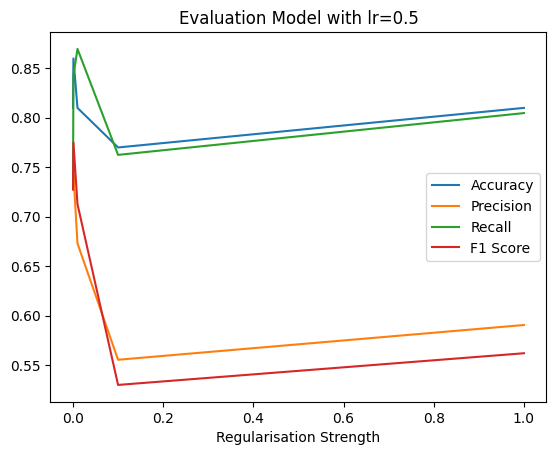

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.9 and regularisation strength = 0.0001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9251368709877111
Accuracy: 0.7600
Precision: 0.7480
Recall: 0.7012
F1 Score: 0.6768


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.9 and regularisation strength = 0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9035534897719771
Accuracy: 0.8100
Precision: 0.5905
Recall: 0.5420
F1 Score: 0.5651


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.9 and regularisation strength = 0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9171947838964646
Accuracy: 0.8600
Precision: 0.7739
Recall: 0.8507
F1 Score: 0.8026


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.9 and regularisation strength = 0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.9088645757448278
Accuracy: 0.7900
Precision: 0.5990
Recall: 0.8555
F1 Score: 0.6062


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eavluations for learning rate = 0.9 and regularisation strength = 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ROC-AUC score 0.8228459075938067
Accuracy: 0.5300
Precision: 0.4738
Recall: 0.4610
F1 Score: 0.3902


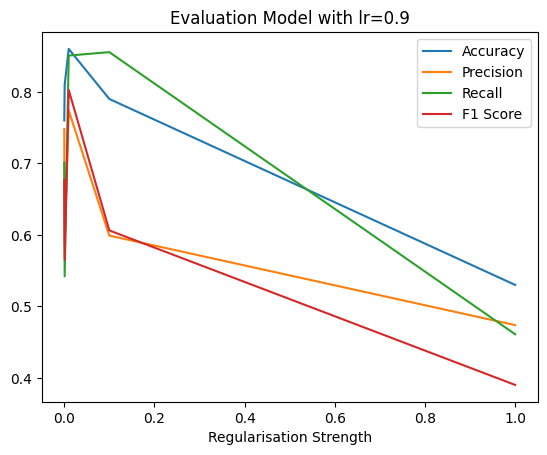

In [ ]:
learning_rates_exp=[0.02,0.1,0.3,0.5,0.9]
lambdas=[0.0001,0.001,0.01,0.1,1]
min_loss=10000
for lr in learning_rates_exp:
    accuracies=[]
    precisions=[]
    recalls=[]
    f1s=[]
    loss_for_reg=0
    for reg in lambdas:
        model= models.Sequential()
        model.add(layers.Dense(3, activation='softmax', input_shape=(X_train.shape[1],),kernel_regularizer=tf.keras.regularizers.l2(reg)))
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.2,verbose=0)
        print(f"Eavluations for learning rate = {lr} and regularisation strength = {reg}")
        y_pred=model.predict(X_test)
        y_pred_classes=np.argmax(y_pred, axis=1)
        y_test_classes=np.argmax(Y_test, axis=1)
        loss_for_reg+=compute_loss(Y_test,y_pred)
        roc_auc_macro = roc_auc_score(Y_test, y_pred, average='macro')
        print(f"ROC-AUC score {roc_auc_macro}")
        accuracy,recall,precision ,f1 =evaluate_model(y_test_classes, y_pred_classes)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    if((loss_for_reg)<min_loss):
            min_loss=loss_for_reg
            best_lr=lr
    plt.plot(lambdas,accuracies,label="Accuracy")
    plt.plot(lambdas,precisions,label="Precision")
    plt.plot(lambdas,recalls,label="Recall")
    plt.plot(lambdas,f1s,label="F1 Score")
    plt.xlabel("Regularisation Strength")
    plt.legend()
    plt.title(f"Evaluation Model with lr={lr}")
    plt.show()


In [ ]:
print(best_lr)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=best_lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.2,verbose=0)
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)
y_test_classes=np.argmax(Y_test, axis=1)
roc_auc_macro = roc_auc_score(Y_test, y_pred, average='macro')
print("Results for the best learning rate")
print(f"ROC-AUC score {roc_auc_macro}")
accuracy,recall,precision ,f1 =evaluate_model(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Results for the best learning rate
ROC-AUC score 0.8999956050796388
Accuracy: 0.6200
Precision: 0.4250
Recall: 0.6308
F1 Score: 0.3824


TASK 7 (K Fold Cross Validation)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)


accuracy_list = []
f1_list = []
recall_list = []
precision_list = []
roc_auc_list = []

for train_index, val_index in kf.split(X_train):
    # Split the data using the indices from KFold
      X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
      Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

      # Define the model
      model = models.Sequential()
      model.add(layers.Dense(3, activation='softmax', input_shape=(X_train.shape[1],)))
      model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
      model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, validation_data=(X_val_fold, Y_val_fold), verbose=0)
      Y_val_pred_prob = model.predict(X_val_fold)
      Y_val_pred = np.argmax(Y_val_pred_prob, axis=1)
      accuracy = accuracy_score(np.argmax(Y_val_fold, axis=1), Y_val_pred)
      f1 = f1_score(np.argmax(Y_val_fold, axis=1), Y_val_pred, average='macro')
      recall = recall_score(np.argmax(Y_val_fold, axis=1), Y_val_pred, average='macro')
      precision = precision_score(np.argmax(Y_val_fold, axis=1), Y_val_pred, average='macro')
      roc_auc = roc_auc_score(Y_val_fold, Y_val_pred_prob)  # One-vs-Rest for multi-class
      accuracy_list.append(accuracy)
      f1_list.append(f1)
      recall_list.append(recall)
      precision_list.append(precision)
      roc_auc_list.append(roc_auc)

# Calculate the average of each metric across all folds
avg_accuracy = np.mean(accuracy_list)
avg_f1 = np.mean(f1_list)
avg_recall = np.mean(recall_list)
avg_precision = np.mean(precision_list)
avg_roc_auc = np.mean(roc_auc_list)

print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average F1 Score: {avg_f1:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average Precision: {avg_precision:.4f}')
print(f'Average ROC AUC Score: {avg_roc_auc:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Average Accuracy: 0.7475
Average F1 Score: 0.5448
Average Recall: 0.5562
Average Precision: 0.5438
Average ROC AUC Score: 0.8364


Now we use Random Forest Classifier for classifying the Target as low , medium or high (part of Task 5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
Rf=RandomForestClassifier()
Rf.fit(X_train,Y_train)
Y_pred_Rf=Rf.predict(X_test)
Y_pred_Rf_classes=np.argmax(Y_pred_Rf, axis=1)
Y_test_classes=np.argmax(Y_test, axis=1)
roc_auc_macro = roc_auc_score(Y_test, Y_pred_Rf, average='macro')
print(f"ROC-AUC score {roc_auc_macro}")
# print(Y_test_classes[:20])
# print(Y_test[:20])
accuracy,recall,precision,f1=evaluate_model(Y_test_classes, Y_pred_Rf_classes)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

ROC-AUC score 0.7791861188920013
Accuracy: 0.7800
Precision: 0.6857
Recall: 0.8430
F1 Score: 0.7284


Additional Tasks

Impact of LDA's dimensionality reduction on -

Interpretability : It is enhanced because LDA reduces the feature space to fewer dimensions, in our case the original dataset is reduced to one column, less dimensions make it easier to visualize and train

Performance of Linear Regression : By reducing the dimensionality, LDA eliminates noise and irrelevant information that can reduce the performance of Linear Regression models. A model with fewer, more relevant features can achieve better performance due to reduced overfitting, especially when the dataset is small.